# Creating and Backtesting SMA Strategies

## Getting the Data

In [3]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access the PROJECT_FILES variable
project_files = os.getenv("PROJECT_FILES_PT3")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [3]:
df = pd.read_csv(os.path.join(project_files, 'eurusd.csv'), parse_dates = ["Date"], index_col = "Date")

In [4]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


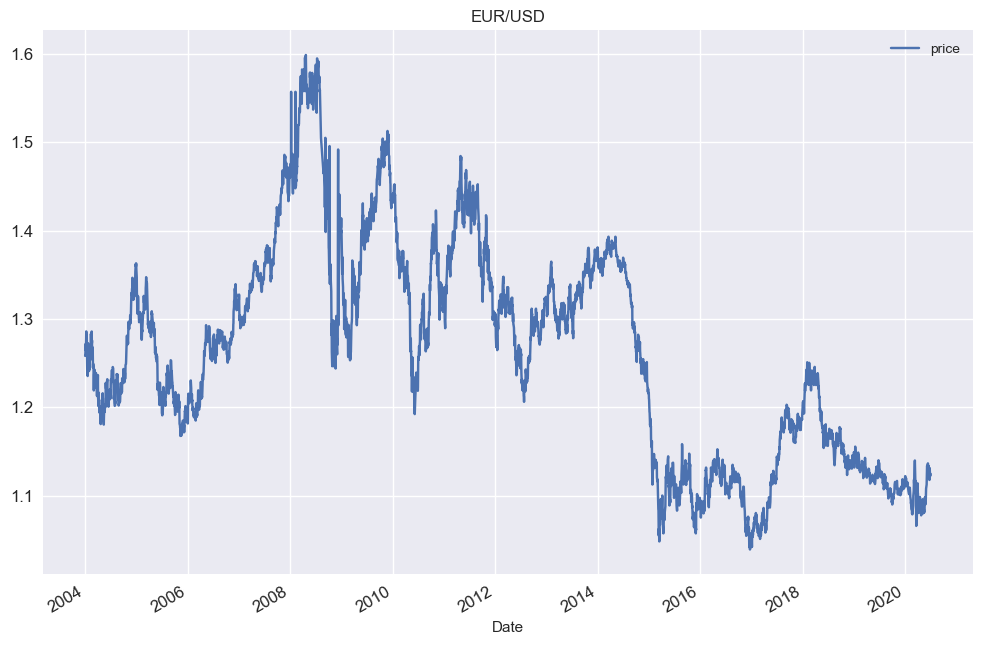

In [6]:
df.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [20]:
df["returns"] = np.log(df.price.div(df.price.shift(1)))

In [21]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,NaN,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


## A simple Buy and Hold "Strategy"

In [9]:
df.dropna(inplace = True)

In [10]:
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


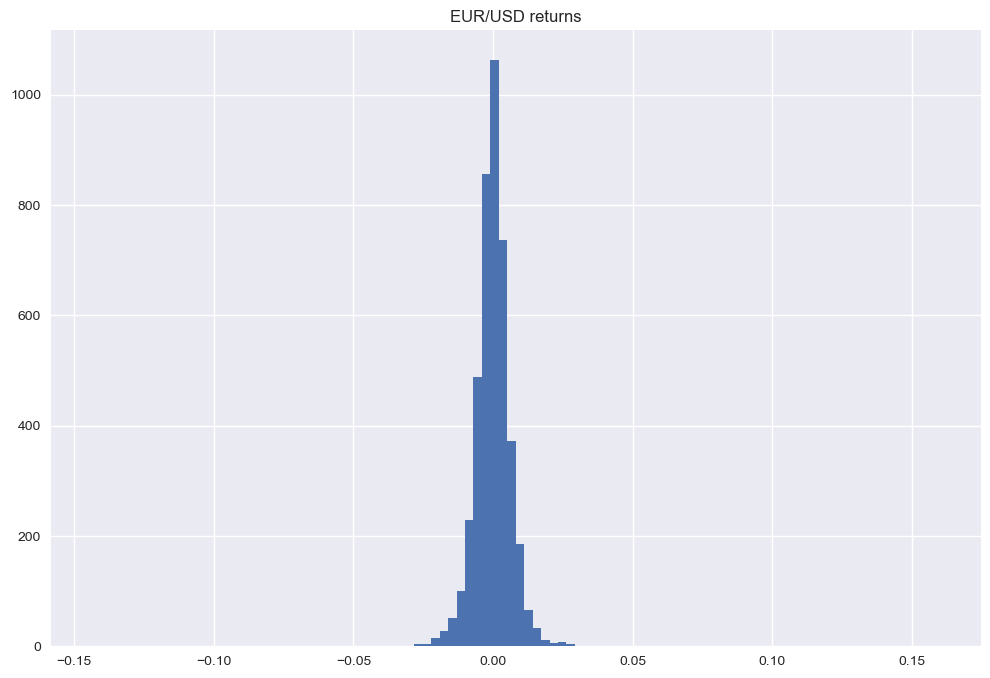

In [11]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("EUR/USD returns")
plt.show()

In [12]:
# Now, the question is, what is the cumulative return over time?
# As we are working with log returns, we can simply add the returns and take the sum log returns time additive and therefore we can simply sum up all the returns

df.returns.sum()

-0.11214302770699758

In [13]:
# And we can also explicitly calculate the ending value at the middle of that year. And we can do this by having E to the power of the cumulative log return 

np.exp(df.returns.sum())

0.8939163935445148

In [ ]:
# df.price[-1] / df.price[0] # old

In [15]:
df.price.iloc[-1] / df.price.iloc[0] # new

0.8939163935445141

In [16]:
# At each and every timestamp and we can do the following.
# We have our log returns and then we can use actually cumsum.
# We can calculate for each and every timestamp the cumulative return from the start to the timestamp.

df.returns.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [17]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [18]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


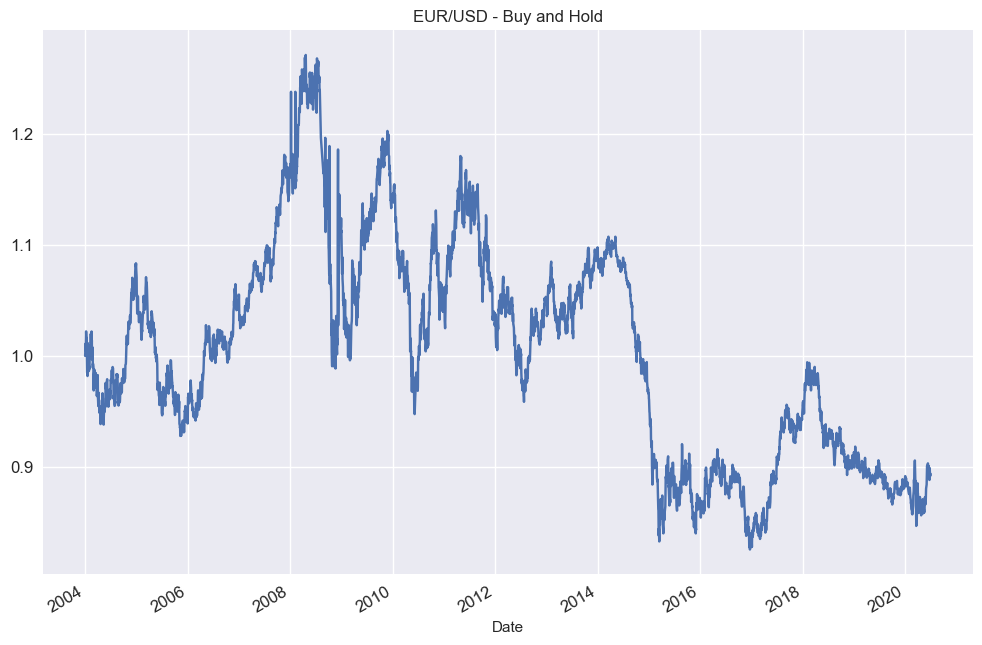

In [ ]:
# normalised returns chart 

df.creturns.plot(figsize = (12, 8), title = "EUR/USD - Buy and Hold", fontsize = 12)
plt.show()

## More Performance Metrics

In [23]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,NaN,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [24]:
df.creturns.iloc[-1] # absolute Performance 

0.8939163935445149

In [25]:
df.returns.sum() # absolute Performance

-0.11214302770699758

In [26]:
df.describe()

,price,returns,creturns
count,4274.000000,4273.000000,4274.000000
mean,1.262336,-0.000026,1.003292
std,0.122233,0.007594,0.097150
min,1.039047,-0.143324,0.825824
25%,1.145548,-0.003370,0.910470
50%,1.269205,0.000000,1.008751
75%,1.348909,0.003364,1.072099
max,1.598798,0.159632,1.270709


__annualized mean return and risk__

In [27]:
df.returns.mean() * 252 # mean return

-0.006613630466221247

In [28]:
df.returns.std() * np.sqrt(252) # risk

0.12055531208739026

__maximum drawdown__

In [29]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,NaN,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [30]:
df["cummax"] = df.creturns.cummax()

In [31]:
df

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,NaN,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


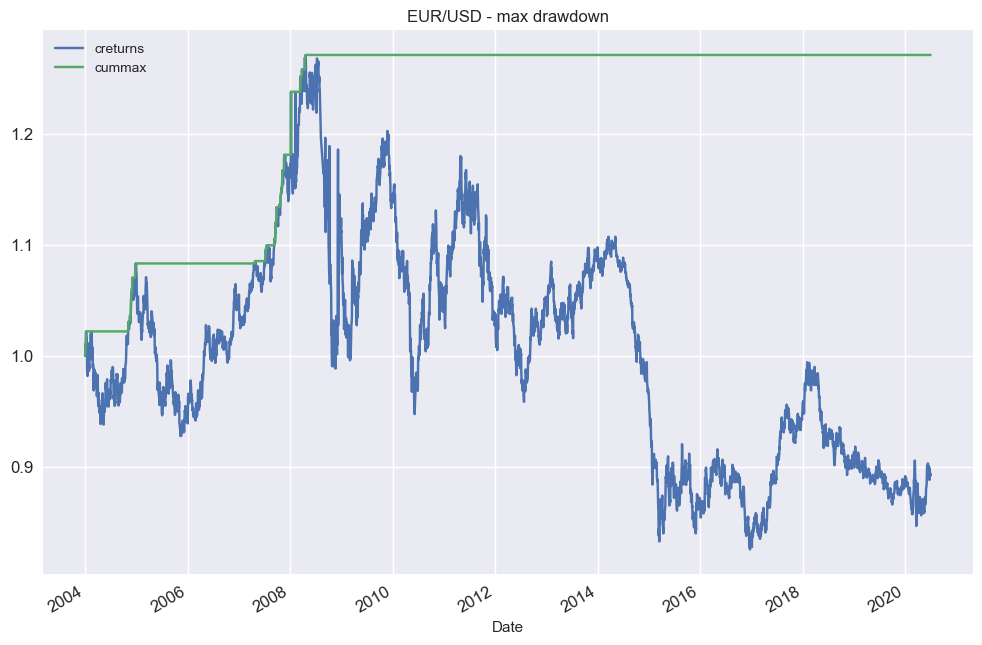

In [32]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "EUR/USD - max drawdown", fontsize = 12)
plt.show()

In [33]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [34]:
drawdown.max() # maximum drawdown

0.4448840569933439

In [35]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

## Defining an SMA Crossover Strategy

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [5]:
data = pd.read_csv(os.path.join(project_files, 'eurusd.csv'), parse_dates = ["Date"], index_col = "Date")

In [6]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [ ]:
sma_s = 50
sma_l = 200

In [ ]:
# for column price give rolling over past 50 days the mean (avg price)
data.price.rolling(50).mean()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.101794
2020-06-25    1.102486
2020-06-26    1.103213
2020-06-29    1.103931
2020-06-30    1.104695
Name: price, Length: 4275, dtype: float64

In [ ]:
# using the above logic, we create SMA_S and SMA_L columns, where price avg of past x rolling days

data["SMA_S"] = data.price.rolling(sma_s).mean()

In [12]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [13]:
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


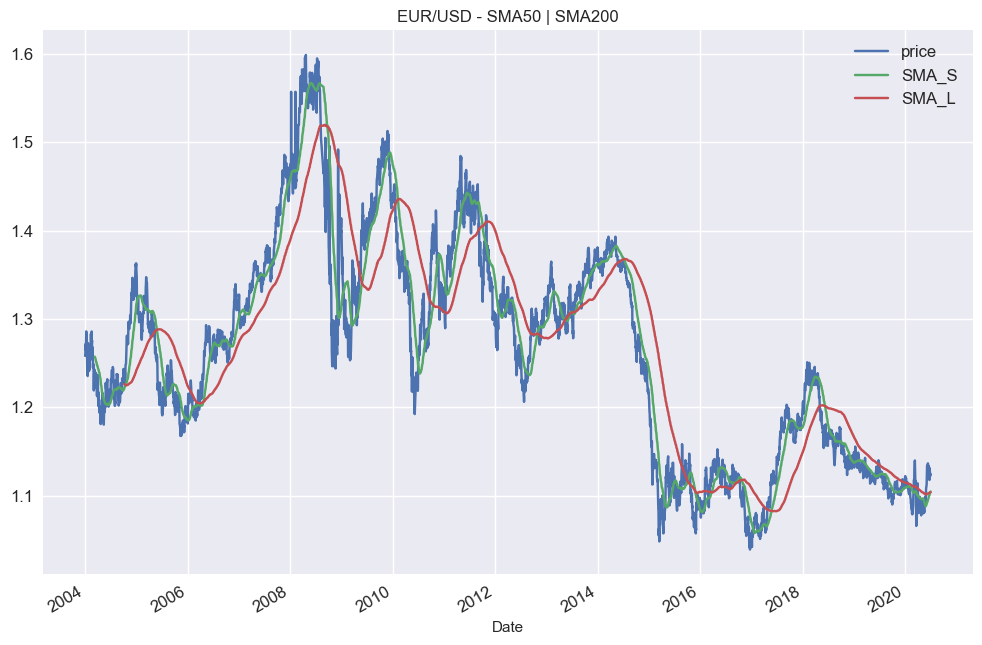

In [14]:
data.plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
# don't need the dates for which we don't have SMA_S or SMA_L data

data.dropna(inplace = True)

In [16]:
data

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


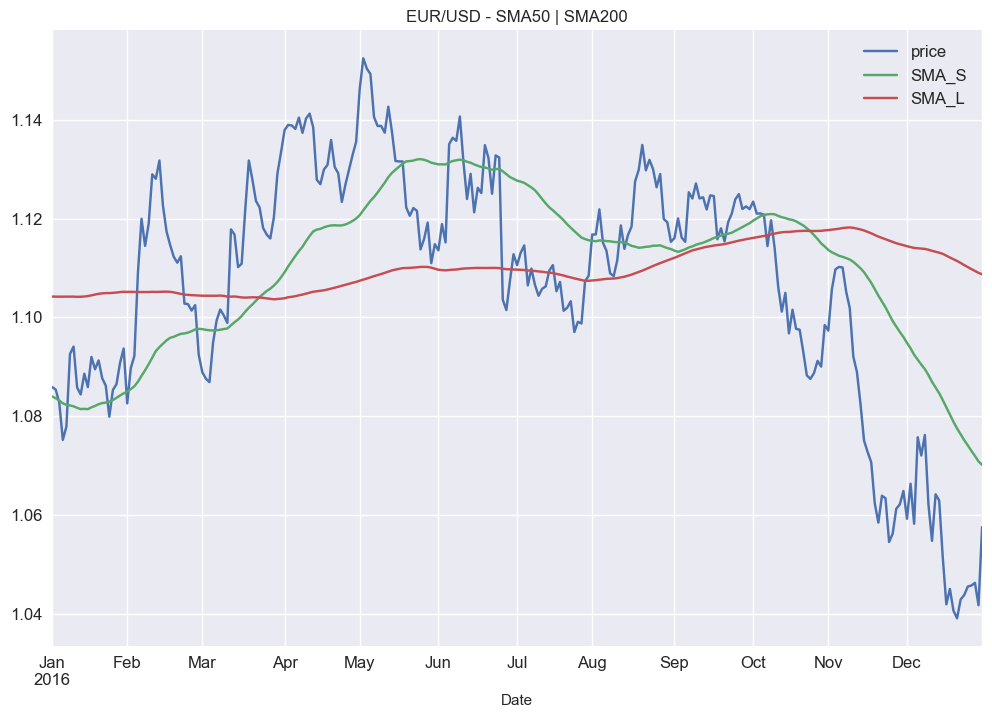

In [ ]:
# in data table, whereever data starts with 2016, plot...

data.loc["2016"].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
# strategy is to buy (1) when SMA_S higher than SMA_L and sell (-1) when SMA_S < SMA_L

data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )

In [19]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


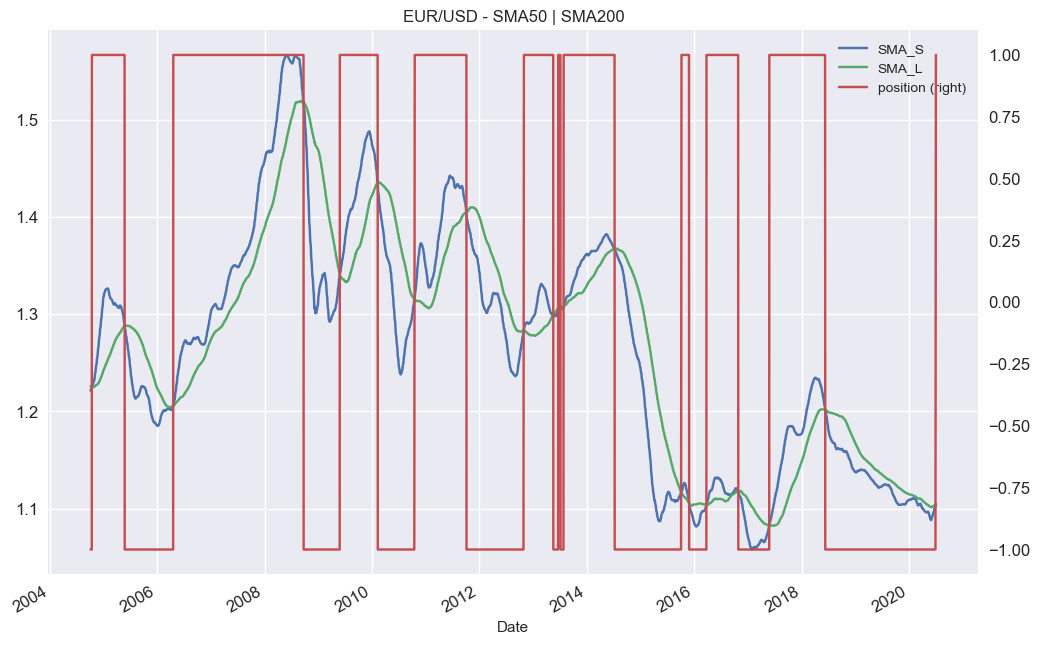

In [ ]:
# from data, get whole index and the following columns...

data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

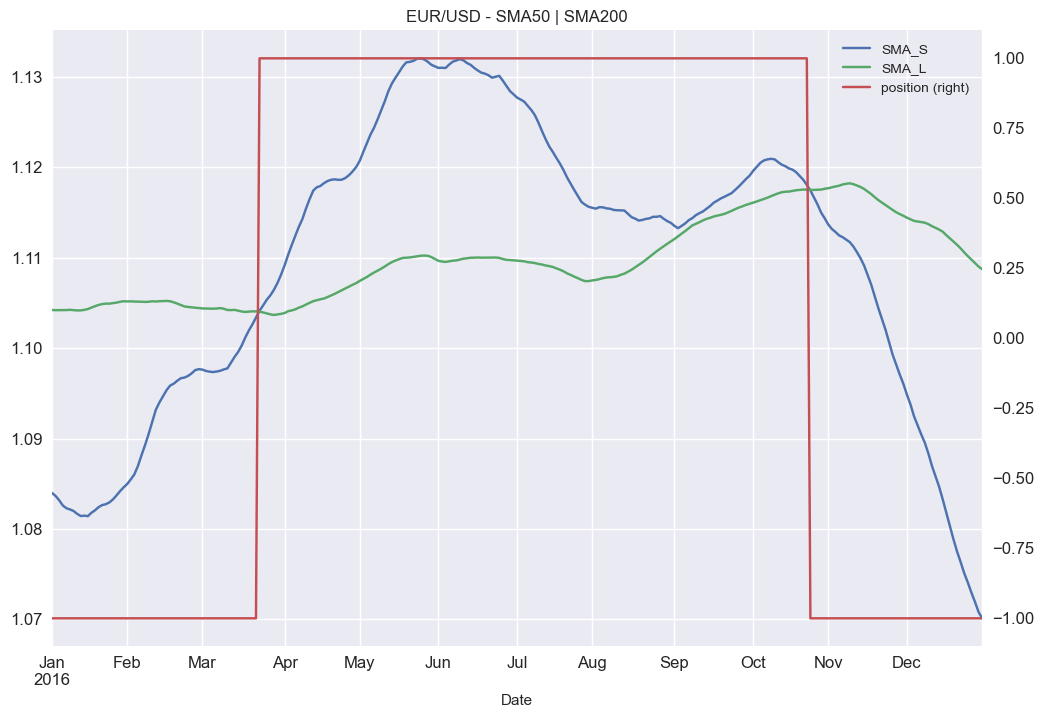

In [21]:
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

## Vectorized Strategy Backtesting

In [24]:
data

,price,SMA_S,SMA_L,position,returns
Date,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102
...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562


In [ ]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [ ]:
# position column contains position to take the NEXT day, so need to shift by 1

data["strategy"] = data.position.shift(1) * data["returns"]

In [27]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [28]:
data.dropna(inplace = True)

In [29]:
data[["returns", "strategy"]].sum() # absolute performance

returns    -0.087929
strategy    0.249591
dtype: float64

In [30]:
data[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     0.915826
strategy    1.283500
dtype: float64

In [ ]:
data[["returns", "strategy"]].mean() * 252 # annualized return

In [ ]:
data[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

## Finding the optimal SMA Strategy

In [ ]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
df

In [ ]:
def test_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return np.exp(data["strategy"].sum())

In [ ]:
test_strategy((50, 200))

In [ ]:
test_strategy((75, 150))

In [ ]:
test_strategy((25, 252))

In [ ]:
SMA_S_range = range(10, 50, 1)
SMA_L_range = range(100, 252, 1)

In [ ]:
SMA_S_range

In [ ]:
from itertools import product

In [ ]:
list(product(SMA_S_range, SMA_L_range))

In [ ]:
combinations = list(product(SMA_S_range, SMA_L_range))

In [ ]:
len(combinations)

In [ ]:
(50-10) * (252-100)

In [ ]:
results = []
for comb in combinations:
    results.append(test_strategy(comb))

In [ ]:
results

In [ ]:
np.max(results)

In [ ]:
np.argmax(results)

In [ ]:
combinations[np.argmax(results)]

In [ ]:
many_results = pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
many_results

In [ ]:
many_results["performance"] = results

In [ ]:
many_results

In [ ]:
many_results.nlargest(10, "performance")

In [ ]:
many_results.nsmallest(10, "performance")